<a href="https://colab.research.google.com/github/ritwikraha/Open-Generative-Fill/blob/SLD/notebooks/open_generative_fill_diffedit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup and Installation

In [1]:
!pip install -qq git+https://github.com/ritwikraha/Open-Generative-Fill

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/1

In [2]:
import torch

from open_generative_fill import config
from open_generative_fill.lm_models import run_lm_model
from open_generative_fill.load_data import load_image
from open_generative_fill.vision_models import (
    run_caption_model,
    run_inpainting_pipeline,
    run_segmentaiton_pipeline,
)

/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [9]:
# @title Enter values for generation
image_url = "https://huggingface.co/datasets/pyimagesearch/blog-post-images/resolve/main/cat.jpeg" # @param {type:"string"}
edit_prompt = "change the kitten to a small tiger" # @param {type:"string"}
seed_value = 178334 # @param {type:"slider", min:0, max:999999, step:1}

## Loading the Image and Models

In [7]:
# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
GENERATOR = torch.Generator().manual_seed(seed_value)
# Load the image from the url and get the text prompt
image = load_image(image_url=image_url, image_size=config.IMAGE_SIZE)

## Image Captioning Models

In [8]:
# Image captioning
caption = run_caption_model(
    model_id=config.CAPTION_MODEL_ID, image=image, device=device
)

print(caption)

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

a kitten sitting on top of a leopard print


## Language Model

In [10]:
# Language model
to_replace, replaced_caption = run_lm_model(
    model_id=config.LANGUAGE_MODEL_ID,
    caption=caption,
    edit_prompt=edit_prompt,
    device=device,
)

print(to_replace)
print(replaced_caption)

config.json:   0%|          | 0.00/661 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/206 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:397: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


kitten
a small tiger sitting on top of a leopard print, playful and curious, surrounded by toys and playmates, playful and energetic


## Segmentation Model

preprocessor_config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/620M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

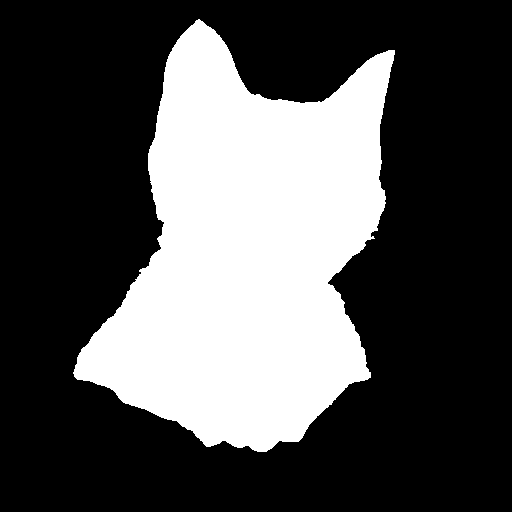

In [11]:
# Segmentation pipeline
segmentation_mask = run_segmentaiton_pipeline(
    detection_model_id=config.DETECTION_MODEL_ID,
    segmentation_model_id=config.SEGMENTATION_MODEL_ID,
    to_replace=to_replace,
    image=image,
    device=device,
)

segmentation_mask

In [19]:
segmentation_mask.size

(512, 512)

In [20]:
from PIL import Image

In [21]:
new_segmentation_mask = segmentation_mask.convert('L')

# Resize to (96, 96)
new_segmentation_mask = new_segmentation_mask.resize((96, 96), Image.ANTIALIAS)

<ipython-input-21-7c3aba078836>:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_segmentation_mask = new_segmentation_mask.resize((96, 96), Image.ANTIALIAS)


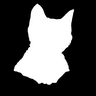

In [24]:
new_segmentation_mask

## Inpainting Model

In [25]:
from diffusers import StableDiffusionDiffEditPipeline
from diffusers import DDIMScheduler, DDIMInverseScheduler

/usr/local/lib/python3.10/dist-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [31]:
pipe = StableDiffusionDiffEditPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [32]:
init_image = image.resize((768, 768))

In [33]:
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.inverse_scheduler = DDIMInverseScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

mask_prompt = to_replace
prompt = replaced_caption

# mask_image = pipe.generate_mask(image=init_image, source_prompt=prompt, target_prompt=mask_prompt)
image_latents = pipe.invert(image=init_image, prompt=mask_prompt).latents

The config attributes {'skip_prk_steps': True} were passed to DDIMInverseScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


  0%|          | 0/40 [00:00<?, ?it/s]

In [34]:
image_latents.shape

torch.Size([1, 40, 4, 96, 96])

In [35]:
output = pipe(prompt=prompt,
             mask_image=new_segmentation_mask,
             image_latents=image_latents).images[0]

  0%|          | 0/40 [00:00<?, ?it/s]

In [41]:
print(prompt)

a small tiger sitting on top of a leopard print, playful and curious, surrounded by toys and playmates, playful and energetic


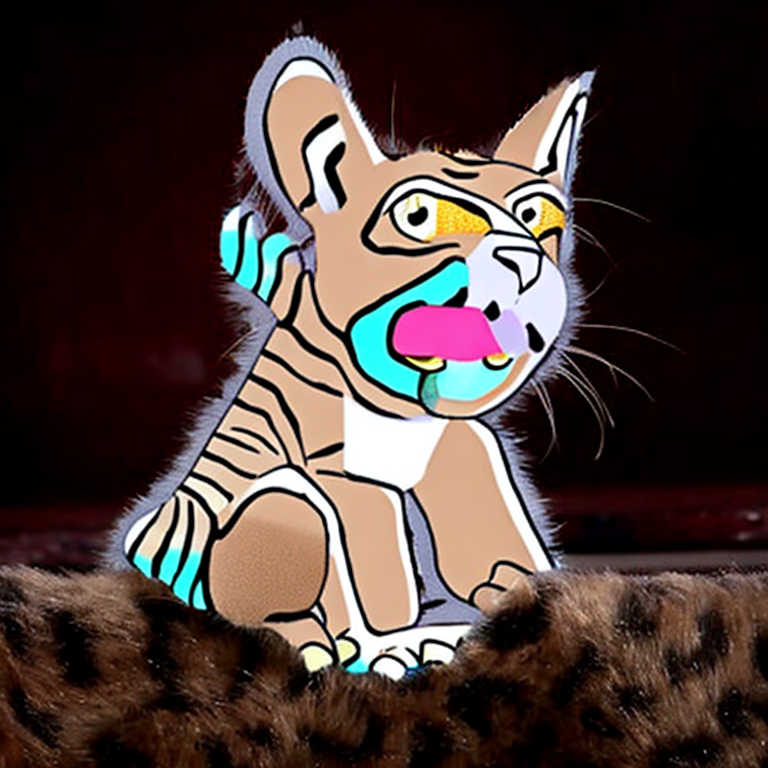

In [42]:
output

In [ ]:
# Inpainting pipeline
output = run_inpainting_pipeline(
    inpainting_model_id=config.INPAINTING_MODEL_ID,
    image=image,
    mask=segmentation_mask,
    replaced_caption=replaced_caption,
    image_size=config.IMAGE_SIZE,
    generator=GENERATOR,
    device=device,
)

## Final Output

In [ ]:
output